# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(study_results, mouse_metadata, how= "left", on="Mouse ID")

# Display the data table for preview
combined_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
total_mice = combined_df["Mouse ID"].unique().size
total_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mouse_id = combined_df[combined_df.duplicated()]["Mouse ID"]
duplicate_mouse_id

137    g989
Name: Mouse ID, dtype: object

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_id_two = combined_df.loc[combined_df["Mouse ID"] == "g989"]
duplicate_mouse_id_two

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combined_df = combined_df[combined_df["Mouse ID"].isin(duplicate_mouse_id_two) == False]
clean_combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
total_mice_two = clean_combined_df["Mouse ID"].unique().size
total_mice_two

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
means = clean_combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
medians = clean_combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variances = clean_combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
standard_dev = clean_combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sems =clean_combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
statistics_summary = pd.DataFrame({
    "Mean Tumor Vol.":means,
    "Median Tumor Vol.":medians,
    "Variance Tumor Vol.":variances,
    "Standard Dev. Tumor Vol.": standard_dev,
    "SEM Tumor Vol.": sems})
statistics_summary

,Mean Tumor Vol.,Median Tumor Vol.,Variance Tumor Vol.,Standard Dev. Tumor Vol.,SEM Tumor Vol.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
statistics_summary = clean_combined_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
statistics_summary
# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

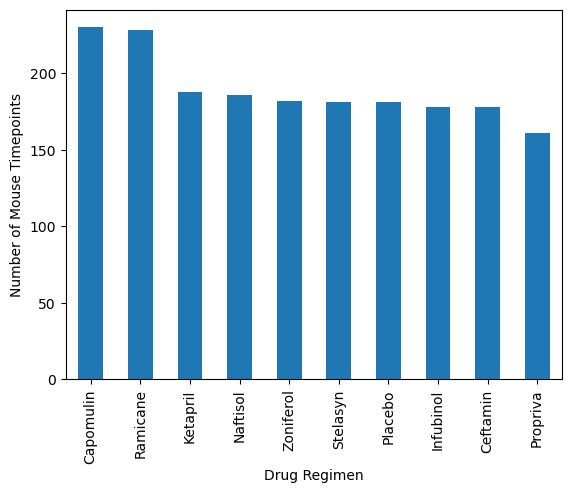

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
count_rows = clean_combined_df["Drug Regimen"].value_counts()
count_rows.plot(kind = "bar")
plt.ylabel("Number of Mouse Timepoints")
plt.show()

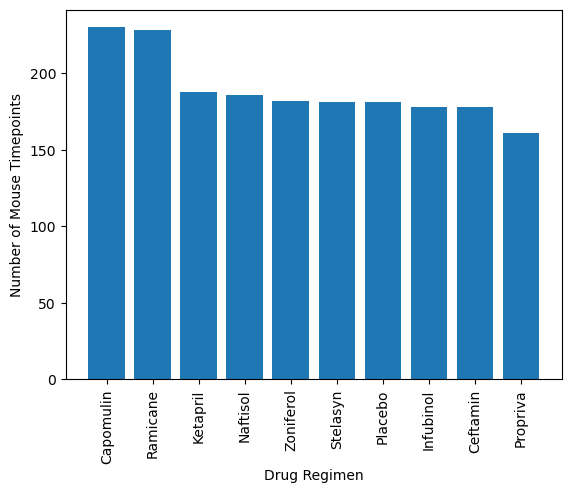

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
count_rows = clean_combined_df["Drug Regimen"].value_counts()
plt.bar(count_rows.index.values, count_rows.values)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mouse Timepoints")
plt.xticks(rotation = 90)
plt.show()

In [11]:
# Finding the number of female & male mice
mice_sex_df = clean_combined_df["Sex"]
sex_data = mice_sex_df.value_counts("Female")
sex_data

Sex
Male      0.506075
Female    0.493925
Name: proportion, dtype: float64

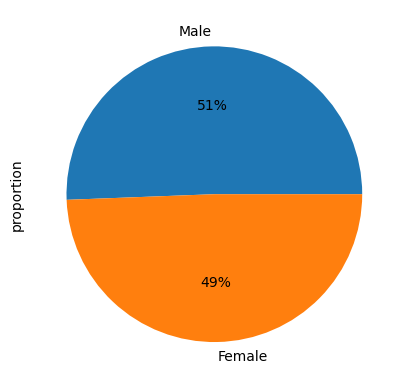

In [12]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
pie_plot = sex_data.plot.pie(autopct='%1.0f%%')
pie_plot.plot(kind = "pie")
plt.show()
# Get the unique mice with their gender


# Make the pie chart


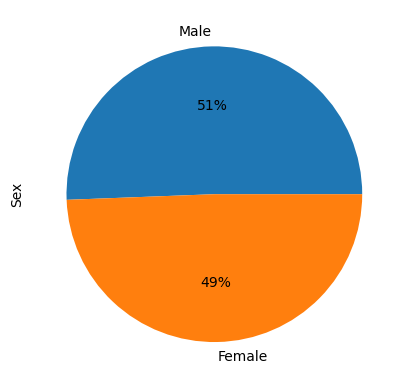

In [13]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
labels = ["Male", "Female"]
plt.pie(sex_data, labels=labels, autopct='%1.0f%%')
plt.ylabel("Sex")
plt.show()        
# Get the unique mice with their gender


# Make the pie chart


## Quartiles, Outliers and Boxplots

In [14]:
# Start by getting the last (greatest) timepoint for each mouse
final_timepoints_per_mouse = clean_combined_df[(clean_combined_df["Timepoint"] == 45)]
final_timepoints_per_mouse

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_clean_df = pd.merge(clean_combined_df, final_timepoints_per_mouse)
final_clean_df.set_index('Mouse ID')
final_clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,n364,45,31.095335,1,Ramicane,Male,4,17
1,b128,45,38.982878,2,Capomulin,Female,9,22
2,l661,45,59.851956,3,Ceftamin,Male,18,26
3,y865,45,64.729837,3,Ceftamin,Male,23,26
4,y769,45,68.594745,4,Ceftamin,Female,6,27
...,...,...,...,...,...,...,...,...
125,r944,45,41.581521,2,Capomulin,Male,12,25
126,u364,45,31.023923,3,Capomulin,Male,18,17
127,p438,45,61.433892,1,Ceftamin,Female,11,26
128,x773,45,58.634971,4,Placebo,Female,21,30


In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_capomulin = final_clean_df[final_clean_df["Drug Regimen"] == "Capomulin"]
final_capomulin

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1,b128,45,38.982878,2,Capomulin,Female,9,22
6,t565,45,34.455298,0,Capomulin,Female,20,17
8,l509,45,41.483008,3,Capomulin,Male,17,21
14,g288,45,37.074024,1,Capomulin,Male,3,19
25,r554,45,32.377357,3,Capomulin,Female,8,17
28,g316,45,40.159220,2,Capomulin,Female,22,22
34,y793,45,31.896238,2,Capomulin,Male,17,17
37,m957,45,33.329098,1,Capomulin,Female,3,19
54,l897,45,38.846876,1,Capomulin,Male,17,19
58,v923,45,40.658124,2,Capomulin,Female,19,21


In [16]:
final_capomulin = final_clean_df[final_clean_df["Drug Regimen"] == "Capomulin"].set_index('Mouse ID')
volume_capomulin = final_capomulin["Tumor Volume (mm3)"]
volume_capomulin

Mouse ID
b128    38.982878
t565    34.455298
l509    41.483008
g288    37.074024
r554    32.377357
g316    40.159220
y793    31.896238
m957    33.329098
l897    38.846876
v923    40.658124
b742    38.939633
w914    36.041047
m601    28.430964
x401    28.484033
s185    23.343598
i738    37.311846
s710    40.728578
j119    38.125164
i557    47.685963
r944    41.581521
u364    31.023923
Name: Tumor Volume (mm3), dtype: float64

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_ramicane = final_clean_df[final_clean_df["Drug Regimen"] == "Ramicane"]
final_ramicane

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,n364,45,31.095335,1,Ramicane,Male,4,17
10,a411,45,38.407618,1,Ramicane,Male,3,22
13,q597,45,45.220869,2,Ramicane,Male,20,25
17,i334,45,36.374510,2,Ramicane,Female,8,20
32,s508,45,30.276232,0,Ramicane,Male,1,17
36,z578,45,30.638696,0,Ramicane,Male,11,16
38,e662,45,40.659006,2,Ramicane,Male,8,24
45,m546,45,30.564625,1,Ramicane,Male,18,16
51,k403,45,22.050126,1,Ramicane,Male,21,16
59,c758,45,33.397653,1,Ramicane,Male,9,17


In [18]:
final_ramicane = final_clean_df[final_clean_df["Drug Regimen"] == "Ramicane"].set_index('Mouse ID')
volume_ramicane = final_ramicane["Tumor Volume (mm3)"]
volume_ramicane

Mouse ID
n364    31.095335
a411    38.407618
q597    45.220869
i334    36.374510
s508    30.276232
z578    30.638696
e662    40.659006
m546    30.564625
k403    22.050126
c758    33.397653
j989    36.134852
j913    31.560470
a444    43.047543
d251    37.311236
a520    38.810366
u196    40.667713
g791    29.128472
r811    37.225650
a644    32.978522
i177    33.562402
Name: Tumor Volume (mm3), dtype: float64

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_infubinol = final_clean_df[final_clean_df["Drug Regimen"] == "Infubinol"]
final_infubinol

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
16,y163,45,67.685569,3,Infubinol,Female,17,27
18,c139,45,72.226731,2,Infubinol,Male,11,28
21,z581,45,62.754451,3,Infubinol,Female,24,25
23,a251,45,65.525743,1,Infubinol,Female,21,25
26,k483,45,66.196912,3,Infubinol,Female,20,30
31,a685,45,66.083066,3,Infubinol,Male,8,30
39,e476,45,62.435404,1,Infubinol,Male,23,26
41,a203,45,67.973419,2,Infubinol,Female,20,23
43,f345,45,60.918767,1,Infubinol,Male,23,26


In [20]:
final_infubinol = final_clean_df[final_clean_df["Drug Regimen"] == "Infubinol"].set_index('Mouse ID')
volume_infubinol = final_infubinol["Tumor Volume (mm3)"]
volume_infubinol

Mouse ID
y163    67.685569
c139    72.226731
z581    62.754451
a251    65.525743
k483    66.196912
a685    66.083066
e476    62.435404
a203    67.973419
f345    60.918767
Name: Tumor Volume (mm3), dtype: float64

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_ceftamin = final_clean_df[final_clean_df["Drug Regimen"] == "Ceftamin"]
final_ceftamin

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
2,l661,45,59.851956,3,Ceftamin,Male,18,26
3,y865,45,64.729837,3,Ceftamin,Male,23,26
4,y769,45,68.594745,4,Ceftamin,Female,6,27
9,j296,45,61.849023,3,Ceftamin,Female,24,30
27,w151,45,67.527482,3,Ceftamin,Male,24,25
47,l471,45,67.748662,1,Ceftamin,Female,7,28
92,x581,45,64.634949,3,Ceftamin,Female,19,28
93,a275,45,62.999356,3,Ceftamin,Female,20,28
95,k210,45,68.923185,3,Ceftamin,Male,15,28
99,x822,45,61.386660,3,Ceftamin,Male,3,29


In [22]:
final_ceftamin = final_clean_df[final_clean_df["Drug Regimen"] == "Ceftamin"].set_index('Mouse ID')
volume_ceftamin = final_ceftamin["Tumor Volume (mm3)"]
volume_ceftamin

Mouse ID
l661    59.851956
y865    64.729837
y769    68.594745
j296    61.849023
w151    67.527482
l471    67.748662
x581    64.634949
a275    62.999356
k210    68.923185
x822    61.386660
l733    64.299830
o287    59.741901
p438    61.433892
Name: Tumor Volume (mm3), dtype: float64

In [43]:
# Put treatments into a list for for loop (and later for plot labels)
treaments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
treaments

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.

    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset
    # Determine outliers using upper and lower bounds
capomulin_quartiles = volume_capomulin.quantile([0.25, 0.50, 0.75])
capomulin_lowerq = capomulin_quartiles[0.25]
capomulin_upperq = capomulin_quartiles[0.75]
capomulin_iqr = capomulin_upperq-capomulin_lowerq
capomulin_bound_lower = capomulin_lowerq-(1.5*capomulin_iqr)
capomulin_bound_upper = capomulin_upperq+(1.5*capomulin_iqr)
print(f"Capomulin IQR: {capomulin_iqr}")
print(f"Capomulin below values: {capomulin_bound_lower} could be outliers")
print(f"Capomulin below values: {capomulin_bound_upper} could be outliers")
print(f"-----------------------------------------------------------")

ramicane_quartiles = volume_ramicane.quantile([0.25, 0.50, 0.75])
ramicane_lowerq = ramicane_quartiles[0.25]
ramicane_upperq = ramicane_quartiles[0.75]
ramicane_iqr = ramicane_upperq-ramicane_lowerq
ramicane_bound_lower = ramicane_lowerq-(1.5*ramicane_iqr)
ramicane_bound_upper = ramicane_upperq+(1.5*ramicane_iqr)
print(f"Ramicane IQR: {capomulin_iqr}")
print(f"Ramicane below values: {ramicane_bound_lower} could be outliers")
print(f"Ramicane below values: {ramicane_bound_upper} could be outliers")
print(f"-----------------------------------------------------------")

infubinol_quartiles = volume_infubinol.quantile([0.25, 0.50, 0.75])
infubinol_lowerq = infubinol_quartiles[0.25]
infubinol_upperq = infubinol_quartiles[0.75]
infubinol_iqr = infubinol_upperq-infubinol_lowerq
infubinol_bound_lower = infubinol_lowerq-(1.5*infubinol_iqr)
infubinol_bound_upper = infubinol_upperq+(1.5*infubinol_iqr)
print(f"Infubinol IQR: {infubinol_iqr}")
print(f"Infubinol below values: {infubinol_bound_lower} could be outliers")
print(f"Infubinol below values: {infubinol_bound_upper} could be outliers")
print(f"-----------------------------------------------------------")

ceftamin_quartiles = volume_ceftamin.quantile([0.25, 0.50, 0.75])
ceftamin_lowerq = ceftamin_quartiles[0.25]
ceftamin_upperq = ceftamin_quartiles[0.75]
ceftamin_iqr = ceftamin_upperq-ceftamin_lowerq
ceftamin_bound_lower = ceftamin_lowerq-(1.5*ceftamin_iqr)
ceftamin_bound_upper = ceftamin_upperq+(1.5*ceftamin_iqr)
print(f"Ceftamin IQR: {ceftamin_iqr}")
print(f"Ceftamin below values: {ceftamin_bound_lower} could be outliers")
print(f"Ceftamin below values: {ceftamin_bound_upper} could be outliers")

Capomulin IQR: 7.781863460000004
Capomulin below values: 20.70456164999999 could be outliers
Capomulin below values: 51.83201549 could be outliers
-----------------------------------------------------------
Ramicane IQR: 7.781863460000004
Ramicane below values: 19.69048010125 could be outliers
Ramicane below values: 49.79900043125001 could be outliers
-----------------------------------------------------------
Infubinol IQR: 4.9311172099999965
Infubinol below values: 55.35777559500001 could be outliers
Infubinol below values: 75.08224443499999 could be outliers
-----------------------------------------------------------
Ceftamin IQR: 6.093590140000003
Ceftamin below values: 52.29350701999999 could be outliers
Ceftamin below values: 76.66786758 could be outliers


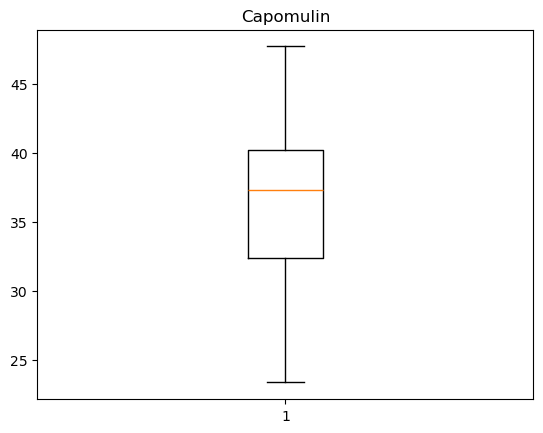

------------------------------------------------------------------------------


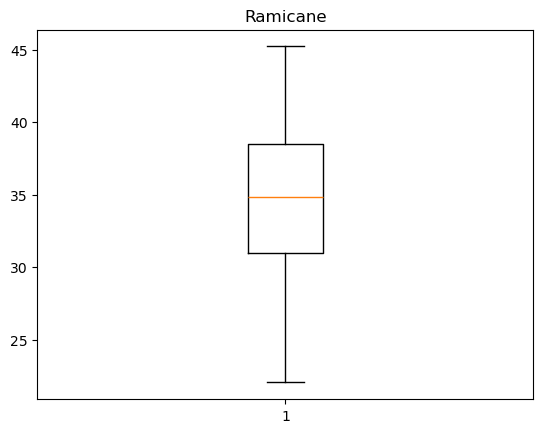

------------------------------------------------------------------------------


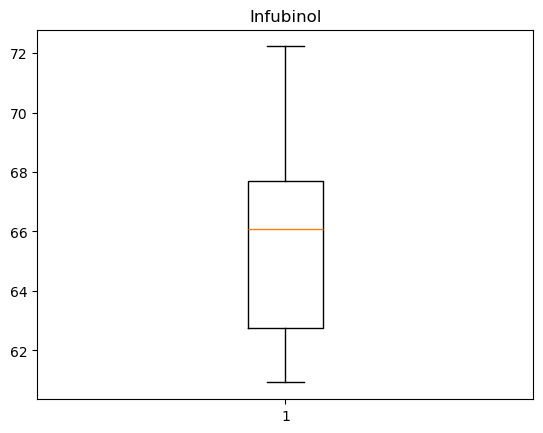

------------------------------------------------------------------------------


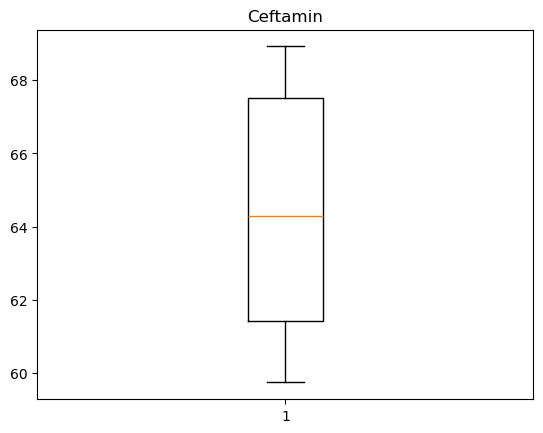

In [40]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
capomulin_box_plot = list(volume_capomulin)
ramicane_box_plot = list(volume_ramicane)
infubinol_box_plot = list(volume_infubinol)
ceftamin_box_plot = list(volume_ceftamin)

# Capomulin Box Plot
fig1, ax1 = plt.subplots()
ax1.set_title("Capomulin")
ax1.set_label("Tumor Vol. (mm3)")
ax1.boxplot(capomulin_box_plot)
plt.show()
print(f"------------------------------------------------------------------------------")

# Ramicane Box Plot
fig1, ax1 = plt.subplots()
ax1.set_title("Ramicane")
ax1.set_label("Tumor Vol. (mm3)")
ax1.boxplot(ramicane_box_plot)
plt.show()
print(f"------------------------------------------------------------------------------")

# Infubinol Box Plot
fig1, ax1 = plt.subplots()
ax1.set_title("Infubinol")
ax1.set_label("Tumor Vol. (mm3)")
ax1.boxplot(infubinol_box_plot)
plt.show()
print(f"------------------------------------------------------------------------------")

# Ceftamin Box Plot
fig1, ax1 = plt.subplots()
ax1.set_title("Ceftamin")
ax1.set_label("Tumor Vol. (mm3)")
ax1.boxplot(ceftamin_box_plot)
plt.show()

## Line and Scatter Plots

In [30]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = clean_combined_df[clean_combined_df['Drug Regimen'] == 'Capomulin']
capomulin_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25


In [32]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_b742_tumor_time_point = capomulin_df[capomulin_df["Mouse ID"] == "b742"]
mouse_b742_tumor_time_point

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
229,b742,0,45.000000,0,Capomulin,Male,7,21
327,b742,5,41.534097,0,Capomulin,Male,7,21
682,b742,10,41.999228,0,Capomulin,Male,7,21
839,b742,15,39.524843,0,Capomulin,Male,7,21
935,b742,20,37.950355,0,Capomulin,Male,7,21
1224,b742,25,38.617684,0,Capomulin,Male,7,21
1308,b742,30,39.167949,0,Capomulin,Male,7,21
1614,b742,35,39.847576,0,Capomulin,Male,7,21
1676,b742,40,38.255627,0,Capomulin,Male,7,21
1829,b742,45,38.939633,0,Capomulin,Male,7,21


In [34]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# x-axis for line plot
x_axis = list(mouse_b742_tumor_time_point["Timepoint"])
x_axis


[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

In [36]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#y-axis for line plot
y_axis = list(mouse_b742_tumor_time_point["Tumor Volume (mm3)"])
y_axis

[45.0,
 41.53409702,
 41.99922813,
 39.52484301,
 37.95035546,
 38.61768433,
 39.1679495,
 39.84757556,
 38.2556274,
 38.93963263]

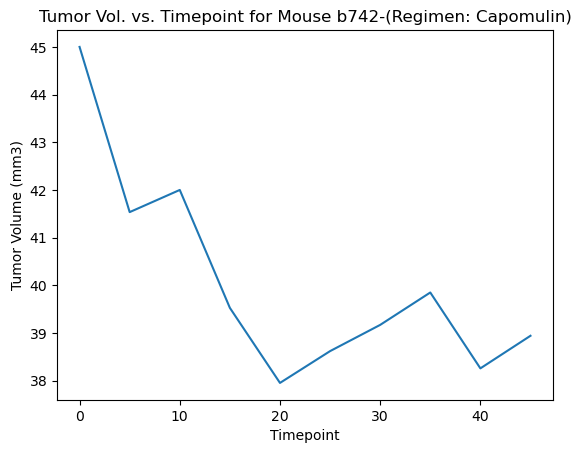

In [37]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
plt.plot(x_axis, y_axis)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Vol. vs. Timepoint for Mouse b742-(Regimen: Capomulin)")
plt.show()

In [39]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_tumor_vol_capomulin = capomulin_df.groupby(["Weight (g)"])["Tumor Volume (mm3)"].mean()
avg_tumor_vol_capomulin

Weight (g)
15    36.182040
17    37.214133
19    41.182391
20    39.141053
21    42.088700
22    43.288490
23    43.341051
24    44.805810
25    44.062109
Name: Tumor Volume (mm3), dtype: float64

In [40]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
x_axis_vol = avg_tumor_vol_capomulin.keys()
x_axis_vol

Index([15, 17, 19, 20, 21, 22, 23, 24, 25], dtype='int64', name='Weight (g)')

In [41]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
y_axis_vol = list(avg_tumor_vol_capomulin)
y_axis_vol

[36.182039562,
 37.21413250092308,
 41.182391363,
 39.14105275,
 42.08870003395833,
 43.288489764999994,
 43.34105084869565,
 44.805809685,
 44.06210875428571]

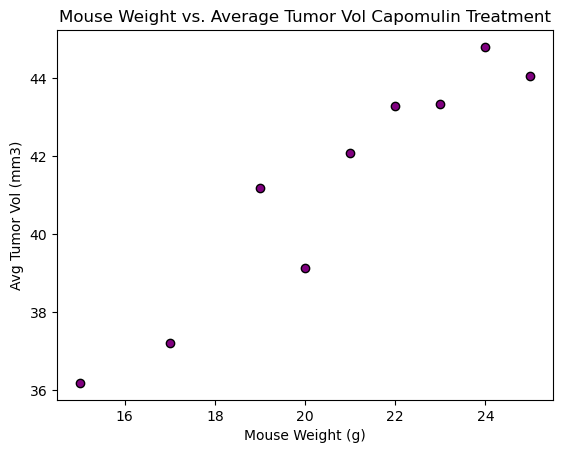

In [42]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.scatter(x_axis_vol, y_axis_vol, facecolor="purple", edgecolors="black")
plt.title("Mouse Weight vs. Average Tumor Vol Capomulin Treatment")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Avg Tumor Vol (mm3)")
plt.show()


## Correlation and Regression

In [45]:
#Dependencies
from scipy.stats import linregress

The r-value is:0.9505243961855268


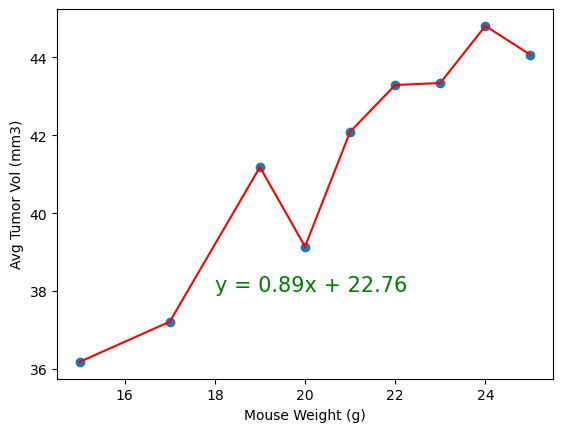

In [47]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_vol, y_axis_vol)
regress_values = x_axis_vol*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis_vol, y_axis_vol)
plt.plot(x_axis_vol, y_axis_vol,"r-")
plt.annotate(line_eq,(18,38),fontsize=15,color="green")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Avg Tumor Vol (mm3)")
print(f"The r-value is:{rvalue}")
plt.show()